<a href="https://colab.research.google.com/github/Vamshi-B558/OIBSIP-Data_Analytics/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style('darkgrid')

In [11]:
#Read the csv file
df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
440672,574544,22845,VINTAGE CREAM CAT FOOD CONTAINER,2.0,11/4/11 14:49,6.35,17084.0,United Kingdom
440673,574544,23115,RED APPLES CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440674,574544,23116,VEGETABLE GARDEN CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440675,574544,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6.0,11/4/11 14:49,2.95,17084.0,United Kingdom


In [12]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/10 8:34,1.69,13047.0,United Kingdom


In [13]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
440672,574544,22845,VINTAGE CREAM CAT FOOD CONTAINER,2.0,11/4/11 14:49,6.35,17084.0,United Kingdom
440673,574544,23115,RED APPLES CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440674,574544,23116,VEGETABLE GARDEN CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440675,574544,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6.0,11/4/11 14:49,2.95,17084.0,United Kingdom
440676,574544,23157,SET,NaN,NaN,NaN,NaN,NaN


In [14]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440677 entries, 0 to 440676
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    440677 non-null  object 
 1   StockCode    440677 non-null  object 
 2   Description  439306 non-null  object 
 3   Quantity     440676 non-null  float64
 4   InvoiceDate  440676 non-null  object 
 5   UnitPrice    440676 non-null  float64
 6   CustomerID   331205 non-null  float64
 7   Country      440676 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.9+ MB


In [16]:
df = df.rename(columns={'InvoiceNo':'INV_NO','StockCode':'S_CODE','Description':'DESC','Quantity':'QUANTITY','InvoiceDate':'INV_DATE','UnitPrice':'UNIT_PRICE','CustomerID':'CUST_ID'})
df

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
440672,574544,22845,VINTAGE CREAM CAT FOOD CONTAINER,2.0,11/4/11 14:49,6.35,17084.0,United Kingdom
440673,574544,23115,RED APPLES CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440674,574544,23116,VEGETABLE GARDEN CHOPPING BOARD,6.0,11/4/11 14:49,4.95,17084.0,United Kingdom
440675,574544,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,6.0,11/4/11 14:49,2.95,17084.0,United Kingdom


In [17]:
df.head()

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [18]:
df.shape

(440677, 8)

In [19]:
#check duplicates
Duplicate_rows = df[df.duplicated()]
Duplicate_rows

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1.0,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1.0,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1.0,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1.0,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
440636,574544,23236,STORAGE TIN VINTAGE DOILY,6.0,11/4/11 14:49,2.89,17084.0,United Kingdom
440637,574544,23240,SET OF 4 KNICK KNACK TINS DOILY,6.0,11/4/11 14:49,4.15,17084.0,United Kingdom
440653,574544,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,12.0,11/4/11 14:49,1.65,17084.0,United Kingdom
440661,574544,23197,SKETCHBOOK MAGNETIC SHOPPING LIST,12.0,11/4/11 14:49,1.45,17084.0,United Kingdom


In [20]:
Duplicate_rows.shape

(3756, 8)

In [21]:
#counts
df.count()

INV_NO        440677
S_CODE        440677
DESC          439306
QUANTITY      440676
INV_DATE      440676
UNIT_PRICE    440676
CUST_ID       331205
Country       440676
dtype: int64

In [22]:
#remove duplicates from dataset
df = df.drop_duplicates()

In [23]:
df.head()

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [24]:
df.count()

INV_NO        436921
S_CODE        436921
DESC          435550
QUANTITY      436920
INV_DATE      436920
UNIT_PRICE    436920
CUST_ID       327490
Country       436920
dtype: int64

In [25]:
#checking null values
df.isnull().sum()

INV_NO             0
S_CODE             0
DESC            1371
QUANTITY           1
INV_DATE           1
UNIT_PRICE         1
CUST_ID       109431
Country            1
dtype: int64

In [26]:
#drop null
df = df.dropna()

In [27]:
df.count()

INV_NO        327490
S_CODE        327490
DESC          327490
QUANTITY      327490
INV_DATE      327490
UNIT_PRICE    327490
CUST_ID       327490
Country       327490
dtype: int64

In [28]:
df.isnull().sum()

INV_NO        0
S_CODE        0
DESC          0
QUANTITY      0
INV_DATE      0
UNIT_PRICE    0
CUST_ID       0
Country       0
dtype: int64

<Axes: xlabel='UNIT_PRICE'>

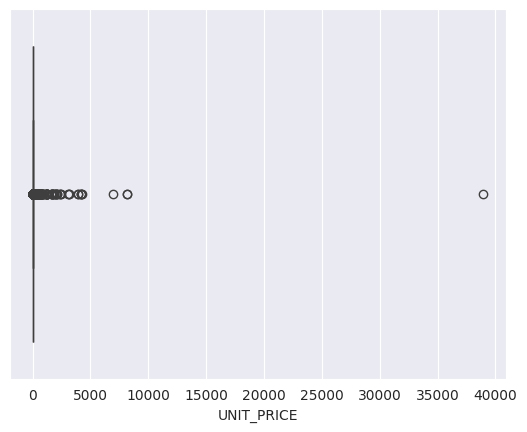

In [29]:
#Detecting Outliers
sns.boxplot(x = df['UNIT_PRICE'])


<Axes: xlabel='QUANTITY'>

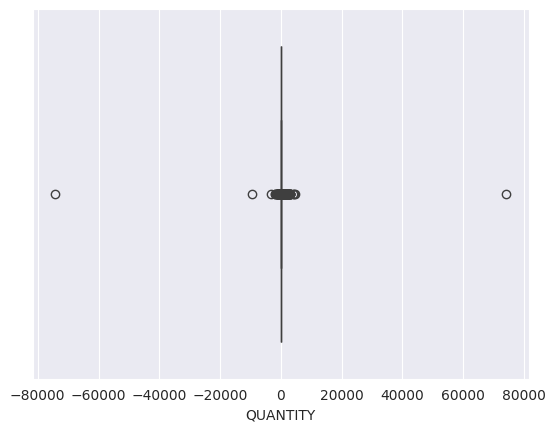

In [30]:
sns.boxplot(x = df['QUANTITY'])

In [31]:
df['CUST_ID'] = df['CUST_ID'].astype('object')

In [32]:
#Analyzing Sales Trends Over Time :
# Assuming 'InvoDt' is the column containing invoice dates
df['INV_DATE'] = pd.to_datetime(df['INV_DATE'])

# Now you can extract month and day of the week
df['Month'] = df['INV_DATE'].dt.month_name()
df['DayOfWeek'] = df['INV_DATE'].dt.day_name()

In [33]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['QUANTITY'].sum()

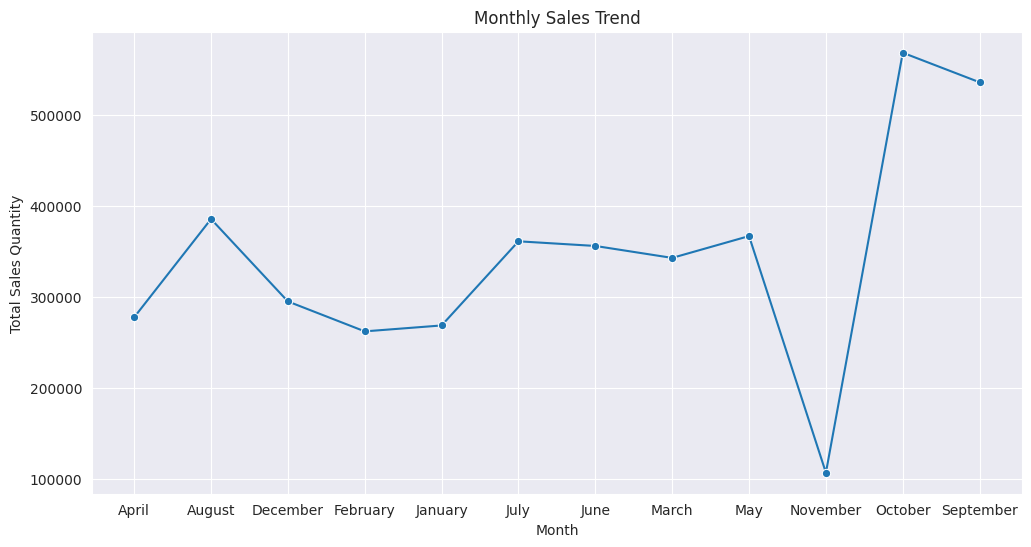

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend')
plt.show()

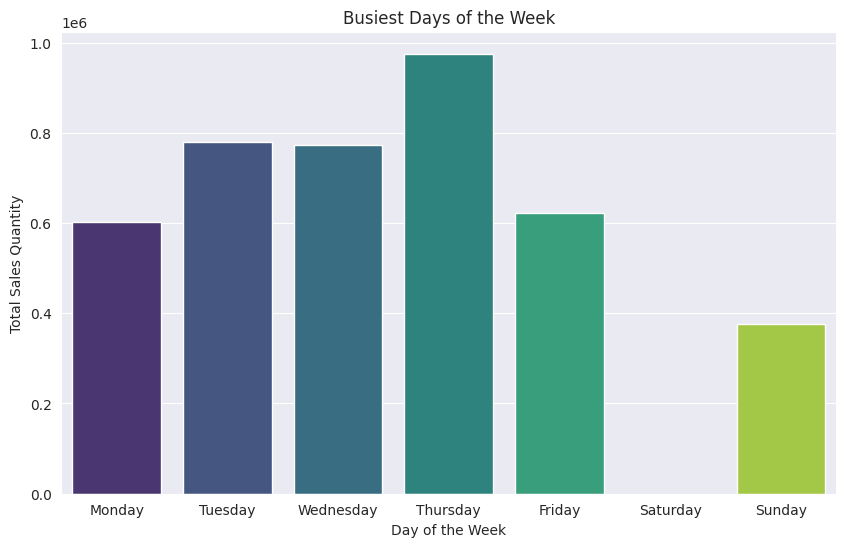

In [35]:
# Busiest days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = df.groupby('DayOfWeek')['QUANTITY'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.title('Busiest Days of the Week')
plt.show()


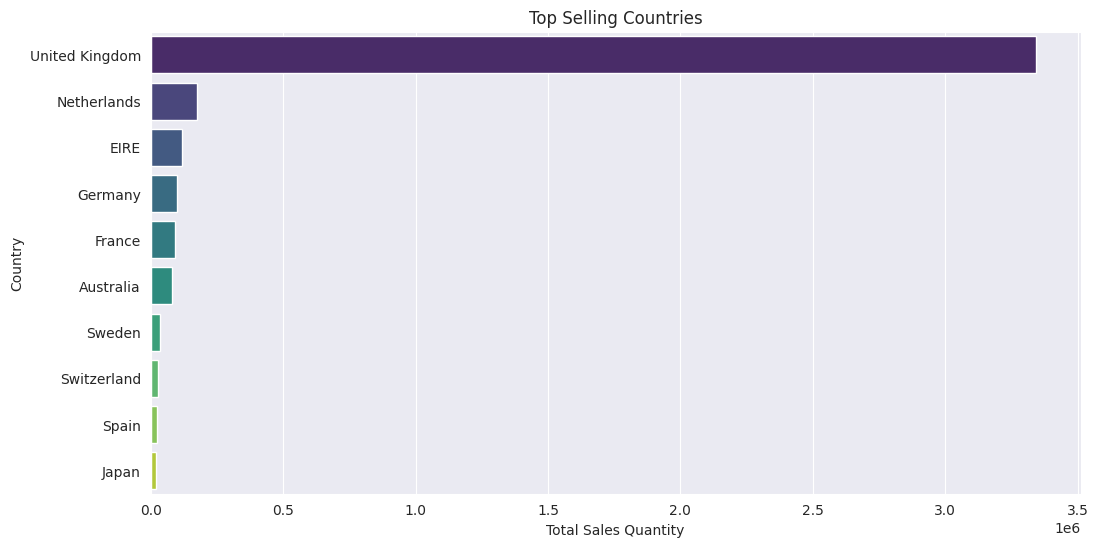

In [36]:
# Top-selling countries
top_countries = df.groupby('Country')['QUANTITY'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

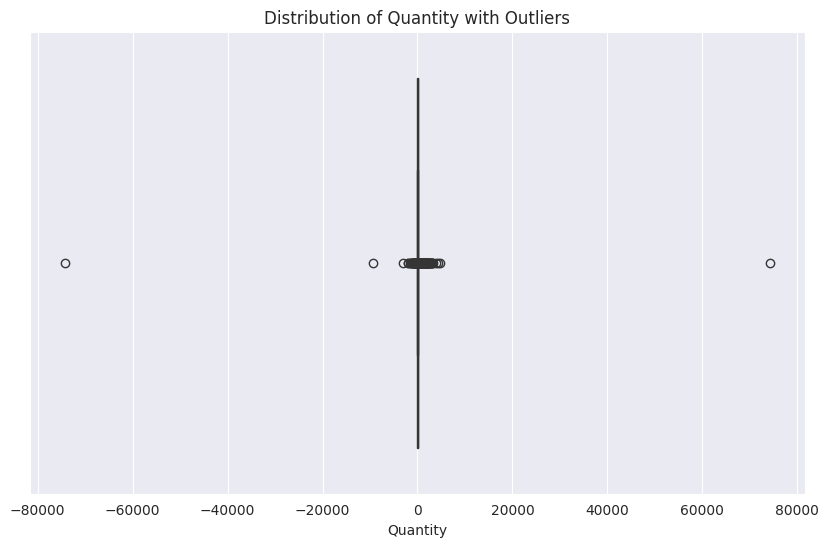

In [37]:
# Boxplot to identify outliers in quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['QUANTITY'], palette='viridis')
plt.xlabel('Quantity')
plt.title('Distribution of Quantity with Outliers')
plt.show()